In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./datasets/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
columns = df.select_dtypes(include=['object'])
columns

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [5]:
pre_df = df.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoders = {}

for column in columns :
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column].tolist())
    encoders[column] = encoder
pre_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [7]:
pre_1_df = pre_df.copy()

In [8]:
pre_df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [9]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [10]:
pre_df.duplicated().sum()

0

In [11]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

<Axes: >

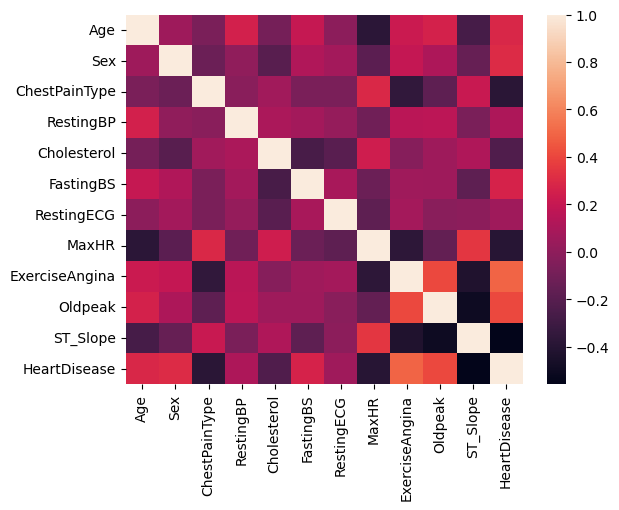

In [12]:
import seaborn as sns
sns.heatmap(pre_df.corr())

In [17]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 데이터 준비 (위 코드와 동일)
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 모델 학습 함수 정의
def train_model(X_train, y_train, lr=0.00009, epochs=100000):
    torch.manual_seed(124)
    W = torch.zeros((X_train.shape[1], 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return W, b

# 모델 성능 평가 함수 정의
def evaluate_model(X, y, W, b):
    with torch.no_grad():
        H = torch.sigmoid(X.matmul(W) + b)
        y_pred = (H > 0.5).float()
        accuracy = accuracy_score(y.numpy(), y_pred.numpy())
    return accuracy

# 원본 데이터로 모델 학습 및 성능 평가
W, b = train_model(X_train, y_train)
baseline_accuracy = evaluate_model(X_test, y_test, W, b)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

# 순열 중요도 계산
permutation_importance = []

for col in range(X_test.shape[1]):
    X_test_permuted = X_test.clone()
    X_test_permuted[:, col] = X_test_permuted[:, col][torch.randperm(X_test_permuted.size(0))]
    
    permuted_accuracy = evaluate_model(X_test_permuted, y_test, W, b)
    importance = baseline_accuracy - permuted_accuracy
    permutation_importance.append(importance)
    print(f'Feature {col}: Permutation Importance = {importance:.4f}')

# 피처 중요도 출력
feature_names = pre_df.columns[:-1]  # 피처 이름들
for col, importance in zip(feature_names, permutation_importance):
    print(f'Feature {col}: Permutation Importance = {importance:.4f}')


Baseline Accuracy: 0.8696
Feature 0: Permutation Importance = 0.0109
Feature 1: Permutation Importance = 0.0326
Feature 2: Permutation Importance = 0.0761
Feature 3: Permutation Importance = 0.0000
Feature 4: Permutation Importance = 0.0652
Feature 5: Permutation Importance = 0.0000
Feature 6: Permutation Importance = 0.0000
Feature 7: Permutation Importance = -0.0109
Feature 8: Permutation Importance = -0.0109
Feature 9: Permutation Importance = 0.0217
Feature 10: Permutation Importance = 0.0326
Feature Age: Permutation Importance = 0.0109
Feature Sex: Permutation Importance = 0.0326
Feature ChestPainType: Permutation Importance = 0.0761
Feature RestingBP: Permutation Importance = 0.0000
Feature Cholesterol: Permutation Importance = 0.0652
Feature FastingBS: Permutation Importance = 0.0000
Feature RestingECG: Permutation Importance = 0.0000
Feature MaxHR: Permutation Importance = -0.0109
Feature ExerciseAngina: Permutation Importance = -0.0109
Feature Oldpeak: Permutation Importance =

In [18]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [12]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [16]:
pre_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [14]:
get_vif(features)

,vif_score,feature
0,30.261977,Age
1,4.912441,Sex
2,1.991361,ChestPainType
3,46.835556,RestingBP
4,5.227740,Cholesterol
5,1.482939,FastingBS
6,3.535198,RestingECG
7,26.142683,MaxHR
8,2.521587,ExerciseAngina
9,2.543331,Oldpeak


In [19]:
pre_df = pre_df.drop(labels=['RestingECG', 'FastingBS', 'RestingBP'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
features, targets = pre_df.iloc[:, :-1] , pre_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(X_train, y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = y_train

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 파라미터 그리드 정의
parameters = {'lg__C': [0.1, 1, 10], 'lg__penalty': ['l1', 'l2']}

# Logistic Regression 객체 생성
lg = LogisticRegression(solver='liblinear', random_state=124)

# 파이프라인 정의
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('lg', lg)
])

# 그리드 서치 객체 생성
g_lg = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')

# 모델 훈련
g_lg.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters for Logistic Regression:", g_lg.best_params_)


Best parameters for Logistic Regression: {'lg__C': 1, 'lg__penalty': 'l2'}


In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[74 13]
 [13 84]]
정확도: 0.8587, 정밀도: 0.8660, 재현율: 0.8660, F1:0.8660, AUC:0.8583
###########################################################################


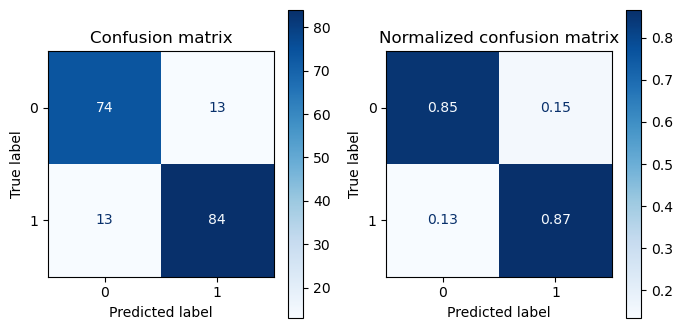

In [24]:
lg = g_lg.best_estimator_
prediction = lg.predict(X_test)
get_evaluation(y_test, prediction, lg, X_test)

In [16]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [18]:
get_vif(features)

,vif_score,feature
0,30.261977,Age
1,4.912441,Sex
2,1.991361,ChestPainType
3,46.835556,RestingBP
4,5.227740,Cholesterol
5,1.482939,FastingBS
6,3.535198,RestingECG
7,26.142683,MaxHR
8,2.521587,ExerciseAngina
9,2.543331,Oldpeak


In [19]:
# pre_df = pre_df.drop(labels=['RestingBP'], axis=1)

In [20]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [21]:
get_vif(features)

,vif_score,feature
0,30.261977,Age
1,4.912441,Sex
2,1.991361,ChestPainType
3,46.835556,RestingBP
4,5.227740,Cholesterol
5,1.482939,FastingBS
6,3.535198,RestingECG
7,26.142683,MaxHR
8,2.521587,ExerciseAngina
9,2.543331,Oldpeak


In [22]:
pre_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### 💡 1 Cycle
> Pytorch로 로지스틱회귀 진행
>
> Validatation Data & TEST Data의 loss 값을 비교하여 과적합 분석

1000/100000: lr: 0.000090, train_loss: 0.5748, val_loss: 0.5624
2000/100000: lr: 0.000090, train_loss: 0.5689, val_loss: 0.5551
3000/100000: lr: 0.000090, train_loss: 0.5636, val_loss: 0.5495
4000/100000: lr: 0.000090, train_loss: 0.5586, val_loss: 0.5444
5000/100000: lr: 0.000090, train_loss: 0.5538, val_loss: 0.5395
6000/100000: lr: 0.000090, train_loss: 0.5491, val_loss: 0.5348
7000/100000: lr: 0.000090, train_loss: 0.5446, val_loss: 0.5303
8000/100000: lr: 0.000090, train_loss: 0.5403, val_loss: 0.5260
9000/100000: lr: 0.000090, train_loss: 0.5362, val_loss: 0.5219
10000/100000: lr: 0.000090, train_loss: 0.5322, val_loss: 0.5179
11000/100000: lr: 0.000090, train_loss: 0.5283, val_loss: 0.5141
12000/100000: lr: 0.000090, train_loss: 0.5247, val_loss: 0.5105
13000/100000: lr: 0.000090, train_loss: 0.5211, val_loss: 0.5070
14000/100000: lr: 0.000090, train_loss: 0.5177, val_loss: 0.5036
15000/100000: lr: 0.000090, train_loss: 0.5143, val_loss: 0.5003
16000/100000: lr: 0.000090, train_

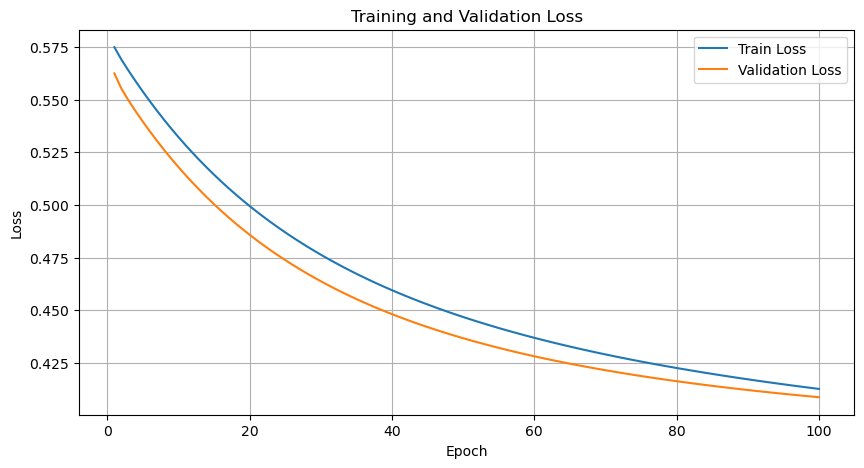

In [23]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 데이터 준비
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 학습률 후보들 정의
# learning_rates = [0.000004, 0.000006, 0.000009, 0.00001, 0.00005]
learning_rates = [0.00009]

# 손실 기록을 위한 리스트 초기화
train_losses = []
val_losses = []

# 위에서 선언한 학습률 후보들 반복
for lr in learning_rates:
    # 모델 초기화
    torch.manual_seed(124)
    W = torch.zeros((11, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    # 모델 훈련
    epochs = 100000
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 1000번 반복마다 손실 기록
        if epoch % 1000 == 0:
            train_losses.append(loss.item())
            val_loss = binary_cross_entropy(torch.sigmoid(X_val.matmul(W) + b), y_val)
            val_losses.append(val_loss.item())
            print('{:4d}/{}: lr: {:.6f}, train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch, epochs, lr, loss.item(), val_loss.item()))

# 손실 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


#### ✨ Pytorch로 검증데이터와 테스트데이터와의 loss 값을 비교해보았을 때  

#### 둘다 큰 차이가 발생하지 않았으므로, 해당 데이터는 과적합이 발생하지 않았음을 알 수 있다.

> Train Data loss: 0.4127 , Test Data loss: 0.4088

In [24]:
print(H)
print(H >= 0.5)
print(W, b)

tensor([[0.8558],
        [0.7223],
        [0.9144],
        [0.7852],
        [0.3205],
        [0.6723],
        [0.5813],
        [0.2252],
        [0.5610],
        [0.9066],
        [0.3309],
        [0.8881],
        [0.3372],
        [0.1084],
        [0.8435],
        [0.6588],
        [0.9830],
        [0.1992],
        [0.8176],
        [0.4189],
        [0.9487],
        [0.3787],
        [0.9043],
        [0.7557],
        [0.3963],
        [0.8359],
        [0.7814],
        [0.0651],
        [0.9108],
        [0.5638],
        [0.3717],
        [0.7634],
        [0.1927],
        [0.2193],
        [0.9327],
        [0.7895],
        [0.6830],
        [0.1080],
        [0.1469],
        [0.9364],
        [0.1487],
        [0.0554],
        [0.5467],
        [0.1204],
        [0.1606],
        [0.5565],
        [0.4046],
        [0.8586],
        [0.8957],
        [0.6902],
        [0.9082],
        [0.5677],
        [0.2847],
        [0.1503],
        [0.3944],
        [0

In [25]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [26]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

오차 행렬
[[45  6]
 [ 6 35]]
정확도: 0.8696, 정밀도: 0.8537, 재현율: 0.8537, F1:0.8537, AUC:0.8680
###########################################################################


### 💡 1 Cycle Result
> Pytorch로 해당 데이터의 과적합을 분석하였더니, 훈련 데이터와 테스트 데이터 간의 손실값 차이가 크지 않으므로 시각화 분석 까지 해본 결과 해당 데이터에는 과적합이 발생하지 않았음을 알 수 있었습니다.
>
> 그 다음 최적의 학습률로 로지스틱회귀분석을 하였을 때, 성능 점수가 매우 높게 나온 것을 알 수 있었습니다.
>
> 

### ✨ 2 Cycle
> Sklearn을 활용해서 로지스틱회귀분석

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

오차 행렬
[[66 16]
 [12 90]]
정확도: 0.8478, 정밀도: 0.8491, 재현율: 0.8824, F1:0.8654, AUC:0.8436
###########################################################################


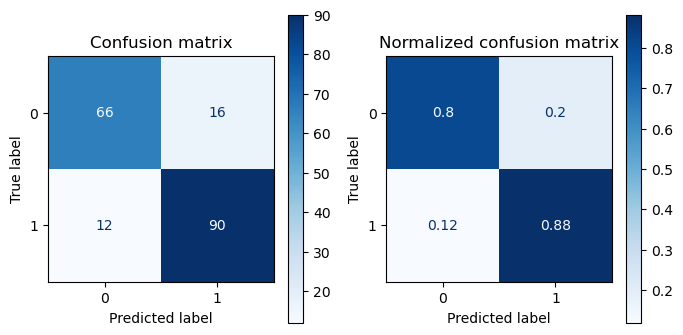

In [29]:
get_evaluation(y_test, prediction, lg, X_test)

### 💡 2 Cycle Result
> Pytorch에서 시그모이드 함수를 사용한 결과와 sklearn에서 Logistic Regression을 사용한 결과가 비슷한 수치를 보이지만
>
> pytorch로 로지스틱회귀분석을 하였을 때가 더 성능이 높은 것을 알 수 있었습니다.
>
> 결론적으로 로지스틱회귀분석을 사용했을 때, 모든 성능점수가 0.8를 상회하는 것을 볼 수 있으므로, 해당 데이터에서는 로지스틱 회귀기법이 좋은 성능을 보인다.

### ✨ 3 Cycle 
> 차원 축소를 한 다음, 로지스틱 회귀 진행

In [30]:
from sklearn.model_selection import train_test_split
features, targets = pre_1_df.iloc[:, :-1] , pre_1_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(X_train, y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = y_train

In [32]:
lda_train_df

,lda1,target
0,-1.338247,0.0
1,-0.874846,1.0
2,-1.578165,0.0
3,-1.801278,1.0
4,1.549450,0.0
...,...,...
729,0.258390,0.0
730,0.997413,NaN
731,2.204229,1.0
732,1.922674,1.0


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 파라미터 그리드 정의
parameters = {'lg__C': [0.1, 1, 10], 'lg__penalty': ['l1', 'l2']}

# Logistic Regression 객체 생성
lg = LogisticRegression(solver='liblinear', random_state=124)

# 파이프라인 정의
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('lg', lg)
])

# 그리드 서치 객체 생성
g_lg = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')

# 모델 훈련
g_lg.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters for Logistic Regression:", g_lg.best_params_)


Best parameters for Logistic Regression: {'lg__C': 0.1, 'lg__penalty': 'l2'}


In [34]:
result_df = pd.DataFrame(g_lg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'lg__C': 0.1, 'lg__penalty': 'l1'}",0.839222,6
1,"{'lg__C': 0.1, 'lg__penalty': 'l2'}",0.844675,1
2,"{'lg__C': 1, 'lg__penalty': 'l1'}",0.843314,2
3,"{'lg__C': 1, 'lg__penalty': 'l2'}",0.843314,2
4,"{'lg__C': 10, 'lg__penalty': 'l1'}",0.843314,2
5,"{'lg__C': 10, 'lg__penalty': 'l2'}",0.843314,2


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[74 13]
 [13 84]]
정확도: 0.8587, 정밀도: 0.8660, 재현율: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


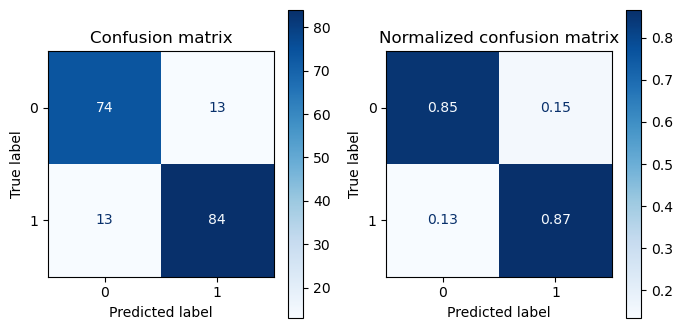

In [36]:
lg = g_lg.best_estimator_
prediction = lg.predict(X_test)
get_evaluation(y_test, prediction, lg, X_test)

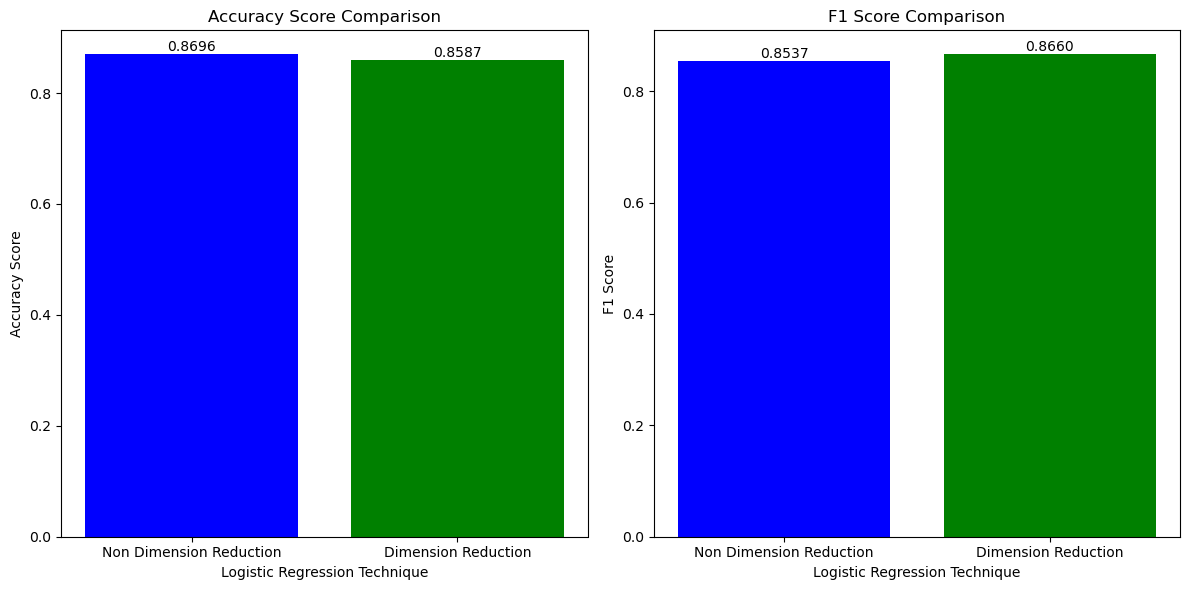

In [37]:
import matplotlib.pyplot as plt

acc_score = [0.8696, 0.8587]
f1_score = [0.8537, 0.8660]
dimension = ['Non Dimension Reduction',  'Dimension Reduction']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Logistic Regression Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Logistic Regression Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

### 💡 2 Cycle Result
- 차원축소를 하지 않고, 로지스틱회귀분석을 사용하였을 경우와 LDA를 통해 2차원으로 차원축소를 하였을 때와 큰 차이가 없음을 알 수 있습니다.
- 로지스틱 회귀 분석을 통해 차원 축소된 데이터에 대한 예측을 수행하고, 이에 따른 임계치를 조정하여 오차 행렬을 분석하겠습니다.

### 💡 3 Cycle
> Logistic Regression 으로 분석한 데이터에 임계치(Threshold) 조절 시행

### 심부전 질환 환자 예측 
#### 오차행렬

- 양성(Positive) > 1: 심부전 질환  환자를 의미.
- 음성(Negative) > 0: 정상 환자를 의미.


> True Positive (TP): 모델이 심부전 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 심부전 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 심부전 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 모델을 심부전 환자로 예측하였을 때 정상적으로 실제 예측한 환자가 심부전 환자인 경우의 비율
>
> 재현율 (Recall) :  실제 심부전 환자 중에서 모델이 정확하게 심부전 환자로 예측 하였는지의 비율
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다. (실제 심부전 환자를 정상으로 잘못분류하지 않게끔 하기 위해)

In [38]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [40]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[74 13]
 [13 84]]
정확도: 0.8587, 정밀도: 0.8660, 재현율: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


In [41]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
오차 행렬
[[42 45]
 [ 1 96]]
정확도: 0.7500, 정밀도: 0.6809, 재현율: 0.9897, F1: 0.8067, ROC_AUC: 0.7362
################################################################################
0.2
오차 행렬
[[52 35]
 [ 2 95]]
정확도: 0.7989, 정밀도: 0.7308, 재현율: 0.9794, F1: 0.8370, ROC_AUC: 0.7885
################################################################################
0.24
오차 행렬
[[58 29]
 [ 5 92]]
정확도: 0.8152, 정밀도: 0.7603, 재현율: 0.9485, F1: 0.8440, ROC_AUC: 0.8076
################################################################################
0.3
오차 행렬
[[61 26]
 [ 6 91]]
정확도: 0.8261, 정밀도: 0.7778, 재현율: 0.9381, F1: 0.8505, ROC_AUC: 0.8196
################################################################################
0.4
오차 행렬
[[67 20]
 [ 9 88]]
정확도: 0.8424, 정밀도: 0.8148, 재현율: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
################################################################################
0.47
오차 행렬
[[73 14]
 [12 85]]
정확도: 0.8587, 정밀도: 0.8586, 재현율: 0.8763, F1: 0.8673, ROC_AUC: 0.8577
################

#### 임계치를 0.4로 낮춰서 재현율을 높혀야 합니다.

In [42]:
from sklearn.preprocessing import Binarizer

threshold = 0.4

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [44]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[67 20]
 [ 9 88]]
정확도: 0.8424, 정밀도: 0.8148, 재현율: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
################################################################################


#### 💡 임계치를 0.4로 낮춘 결과 정확도는 기존 0.85에서 0.84로 낮아졌지만, 재현율을 0.86에서 0.9로 높힐 수 있었고,  

#### F1 Score 또한 0.85로 적합한 수치를 보이므로, 차원축소를 한 데이터에서 얻고자 하는 최종 결과를 얻을 수 있었습니다.

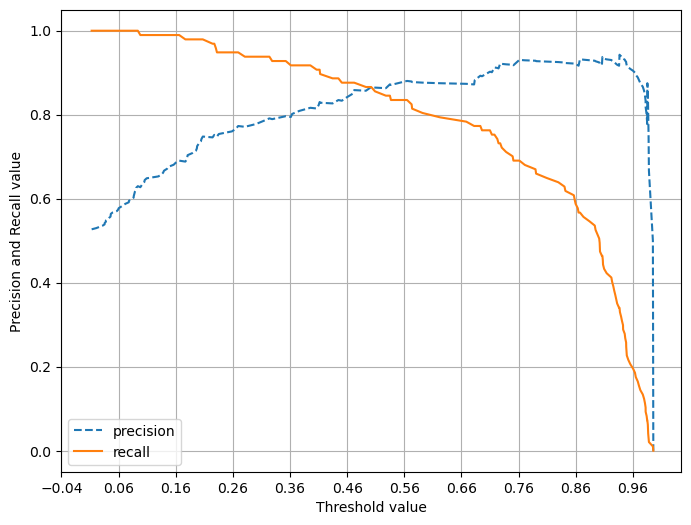

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

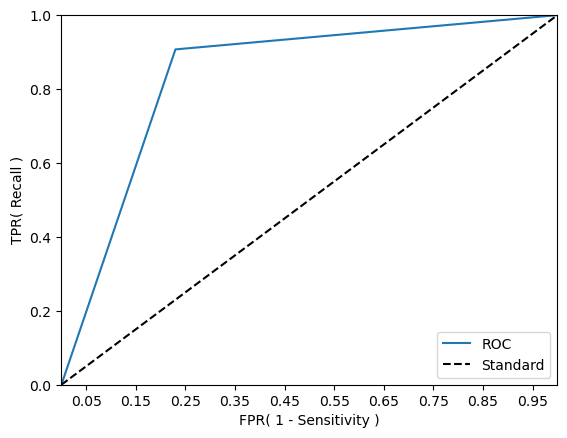

In [46]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

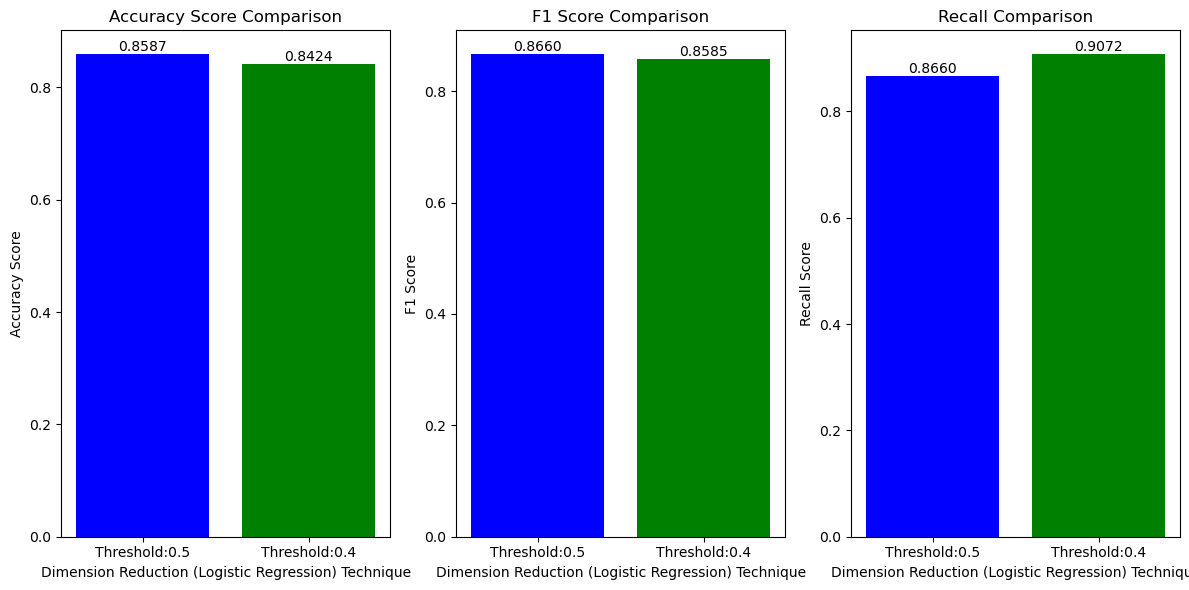

In [47]:
import matplotlib.pyplot as plt
# 0.4
# 오차 행렬
# [[67 20]
#  [ 9 88]]
# 정확도: 0.8424, 정밀도: 0.8148, 재현율: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
# ################################################################################

# 0.5
# 오차 행렬
# [[74 13]
#  [13 84]]
# 정확도: 0.8587, 정밀도: 0.8660, 재현율: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
# ################################################################################

acc_score = [0.8587, 0.8424]
f1_score = [0.8660, 0.8585]
recall_score = [0.8660, 0.9072]

dimension = ['Threshold:0.5', 'Threshold:0.4']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[1].set_ylabel('F1 Score')

# Recall 스코어 바 차트
for i in range(len(dimension)):
    axes[2].bar(dimension[i], recall_score[i], color=['blue',  'green'][i])
    axes[2].text(dimension[i], recall_score[i], f'{recall_score[i]:.4f}', ha='center', va='bottom')

axes[2].set_title('Recall Comparison')
axes[2].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[2].set_ylabel('Recall Score')

plt.tight_layout()
plt.show()

### 💡3 Cycle Result
> 로지스틱 회귀기법을 사용해서 차원축소를 한 결과 임계치를 0.4로 낮출 경우 정확도 점수와 F1 Score는 아주 낮은 폭으로 낮아졌지만, 재현율을 0.86에서 0.9로 높힘으로써 얻고자 하는 결과를 얻을 수 있었습니다.
>
> 최종적으로 임계치를 0.4로 낮출 때 최적의 결과를 얻을 수 있었습니다.

### ✨ 4 Cycle
> 다중공선성 및 OLS 분석을 통해 로지스틱회귀분석의 성능을 높혀보겠습니다.

In [48]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:10:24   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [50]:
get_vif(features)

,vif_score,feature
0,30.261977,Age
1,4.912441,Sex
2,1.991361,ChestPainType
3,46.835556,RestingBP
4,5.227740,Cholesterol
5,1.482939,FastingBS
6,3.535198,RestingECG
7,26.142683,MaxHR
8,2.521587,ExerciseAngina
9,2.543331,Oldpeak


#### 다중공선성에서 문제가 있는 Feature : Age , RestingBP , MaxHR
#### P-Value 점수가 높은 Feature : RestingECG , MaxHR 

In [51]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

### 📌 타겟데이터에 대한 상관관계를 분석 
- 제거할 Feature : RestingBP , RestingECG

In [52]:
pre_df = pre_df.drop(labels=['RestingBP' , 'RestingECG'], axis=1)

In [53]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              342.6
Date:                Wed, 15 May 2024   Prob (F-statistic):                   5.48e-285
Time:                        14:10:24   Log-Likelihood:                         -351.71
No. Observations:                 918   AIC:                                      721.4
Df Residuals:                     909   BIC:                                      764.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [54]:
get_vif(features)

,vif_score,feature
0,18.348505,Age
1,4.812491,Sex
2,1.989646,ChestPainType
3,5.001527,Cholesterol
4,1.474868,FastingBS
5,22.195708,MaxHR
6,2.424020,ExerciseAngina
7,2.530854,Oldpeak
8,9.038754,ST_Slope


### 📌 다중공선성 및 OLS (최소제곱법) 해결 후 로지스틱 회귀 분석 실시

1000/100000: lr: 0.000090, train_loss: 0.5813, val_loss: 0.5671
2000/100000: lr: 0.000090, train_loss: 0.5754, val_loss: 0.5610
3000/100000: lr: 0.000090, train_loss: 0.5699, val_loss: 0.5555
4000/100000: lr: 0.000090, train_loss: 0.5647, val_loss: 0.5503
5000/100000: lr: 0.000090, train_loss: 0.5596, val_loss: 0.5452
6000/100000: lr: 0.000090, train_loss: 0.5547, val_loss: 0.5404
7000/100000: lr: 0.000090, train_loss: 0.5500, val_loss: 0.5357
8000/100000: lr: 0.000090, train_loss: 0.5455, val_loss: 0.5313
9000/100000: lr: 0.000090, train_loss: 0.5412, val_loss: 0.5270
10000/100000: lr: 0.000090, train_loss: 0.5371, val_loss: 0.5229
11000/100000: lr: 0.000090, train_loss: 0.5331, val_loss: 0.5190
12000/100000: lr: 0.000090, train_loss: 0.5292, val_loss: 0.5152
13000/100000: lr: 0.000090, train_loss: 0.5255, val_loss: 0.5116
14000/100000: lr: 0.000090, train_loss: 0.5219, val_loss: 0.5081
15000/100000: lr: 0.000090, train_loss: 0.5185, val_loss: 0.5048
16000/100000: lr: 0.000090, train_

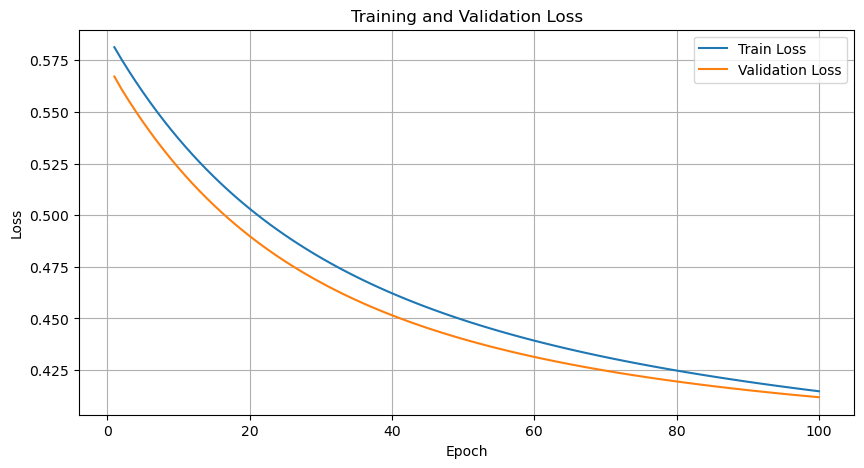

In [55]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 데이터 준비
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 학습률 후보들 정의
# learning_rates = [0.000004, 0.000006, 0.000009, 0.00001, 0.00005]
learning_rates = [0.00009]

# 손실 기록을 위한 리스트 초기화
train_losses = []
val_losses = []

# 위에서 선언한 학습률 후보들 반복
for lr in learning_rates:
    # 모델 초기화
    torch.manual_seed(124)
    W = torch.zeros((9, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    # 모델 훈련
    epochs = 100000
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 1000번 반복마다 손실 기록
        if epoch % 1000 == 0:
            train_losses.append(loss.item())
            val_loss = binary_cross_entropy(torch.sigmoid(X_val.matmul(W) + b), y_val)
            val_losses.append(val_loss.item())
            print('{:4d}/{}: lr: {:.6f}, train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch, epochs, lr, loss.item(), val_loss.item()))

# 손실 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 📌 다중공선성 문제가 있었던 Feature들을 제거 후 pytorch로 과적합을 분석하였습니다.
- ##### 그 결과 이전 Feature 제거 전 보다 train data와 validation data 와의 손실값 차이가 더 줄었으며, 과적합을 더 해소 할 수 있었습니다.

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [57]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

오차 행렬
[[44  7]
 [ 6 35]]
정확도: 0.8587, 정밀도: 0.8333, 재현율: 0.8537, F1: 0.8434, ROC_AUC: 0.8582
################################################################################


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

오차 행렬
[[66 16]
 [10 92]]
정확도: 0.8587, 정밀도: 0.8519, 재현율: 0.9020, F1: 0.8762, ROC_AUC: 0.8534
################################################################################


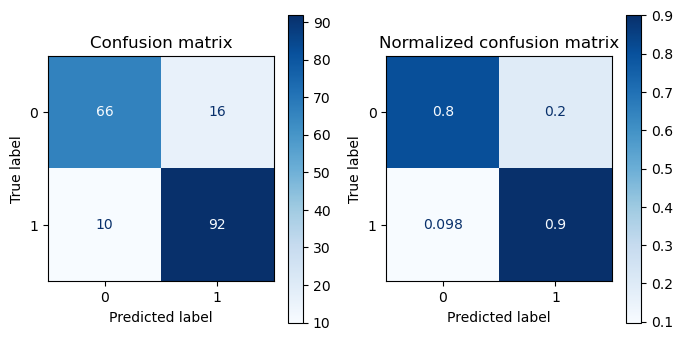

In [59]:
get_evaluation(y_test, prediction, lg, X_test)

### 💡 4 Cycle Result

- 📈 다중공선성 해소 후 파이토치로 로지스틱회귀분석 결과와 사이킷런으로 로지스틱회귀분석을 한 데이터와  차원 축소를 했을 때의 데이터 성능과 정확도 부분에서 동일 한 것을 알 수 있었습니다!
- ✨ 결론적으로 해당 데이터에서 과적합을 완전히 해소하고 신뢰성을 높히려면 다중공선성과 OLS 문제를 일으키는 Feature 제거 후 작업해야 합니다!

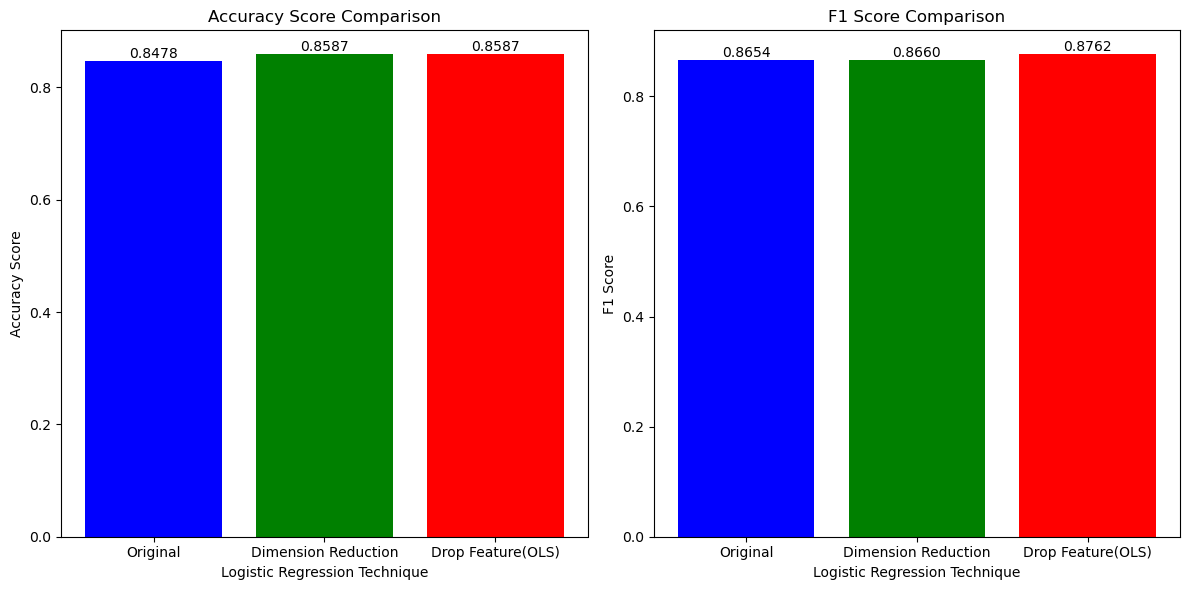

In [100]:
import matplotlib.pyplot as plt

acc_score = [0.8478, 0.8587, 0.8587]
f1_score = [0.8654, 0.8660, 0.8762]
dimension = ['Original',  'Dimension Reduction', 'Drop Feature(OLS)']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue', 'green', 'red'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Logistic Regression Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green', 'red'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Logistic Regression Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

### 💡 5 Cycle 
> Logistic Regression 으로 분석한 데이터에 임계치(Threshold) 조절 시행

### 심부전 질환 환자 예측 
#### 오차행렬

- 양성(Positive) > 1: 심부전 질환  환자를 의미.
- 음성(Negative) > 0: 정상 환자를 의미.


> True Positive (TP): 모델이 심부전 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 심부전 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 심부전 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 모델을 심부전 환자로 예측하였을 때 정상적으로 실제 예측한 환자가 심부전 환자인 경우의 비율
>
> 재현율 (Recall) :  실제 심부전 환자 중에서 모델이 정확하게 심부전 환자로 예측 하였는지의 비율
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다. (실제 심부전 환자를 정상으로 잘못분류하지 않게끔 하기 위해)

In [28]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [30]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[74 13]
 [13 84]]
정확도: 0.8587, 정밀도: 0.8660, 재현율: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


In [31]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
오차 행렬
[[45 42]
 [ 1 96]]
정확도: 0.7663, 정밀도: 0.6957, 재현율: 0.9897, F1: 0.8170, ROC_AUC: 0.7535
################################################################################
0.2
오차 행렬
[[54 33]
 [ 2 95]]
정확도: 0.8098, 정밀도: 0.7422, 재현율: 0.9794, F1: 0.8444, ROC_AUC: 0.8000
################################################################################
0.24
오차 행렬
[[63 24]
 [ 4 93]]
정확도: 0.8478, 정밀도: 0.7949, 재현율: 0.9588, F1: 0.8692, ROC_AUC: 0.8415
################################################################################
0.3
오차 행렬
[[67 20]
 [ 4 93]]
정확도: 0.8696, 정밀도: 0.8230, 재현율: 0.9588, F1: 0.8857, ROC_AUC: 0.8644
################################################################################
0.4
오차 행렬
[[71 16]
 [11 86]]
정확도: 0.8533, 정밀도: 0.8431, 재현율: 0.8866, F1: 0.8643, ROC_AUC: 0.8513
################################################################################
0.47
오차 행렬
[[74 13]
 [12 85]]
정확도: 0.8641, 정밀도: 0.8673, 재현율: 0.8763, F1: 0.8718, ROC_AUC: 0.8634
################

#### 임계치를 0.4로 낮춰서 재현율을 높혀야 합니다.

In [32]:
from sklearn.preprocessing import Binarizer

threshold = 0.3

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [34]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[67 20]
 [ 4 93]]
정확도: 0.8696, 정밀도: 0.8230, 재현율: 0.9588, F1: 0.8857, ROC_AUC: 0.8644
################################################################################


#### 📌 임계치를 0.3으로 낮춘결과 정확도가 0.8696, 재현율이 0.9588, F1 Score가 0.8857로 모두 기존 0.5일때 보다 높게 나왔습니다.

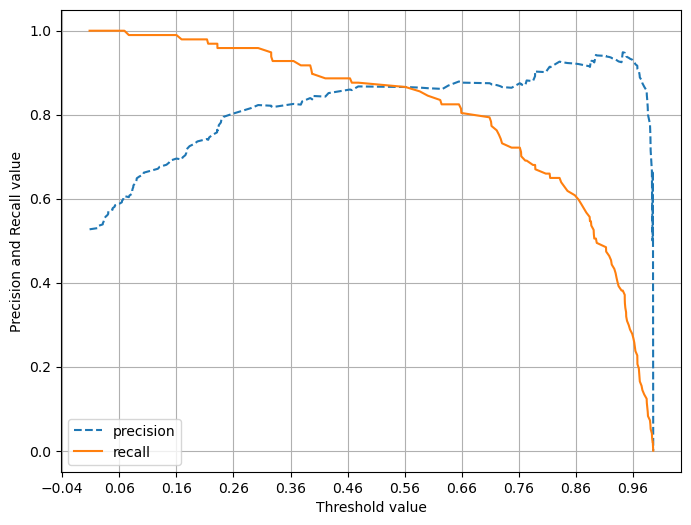

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

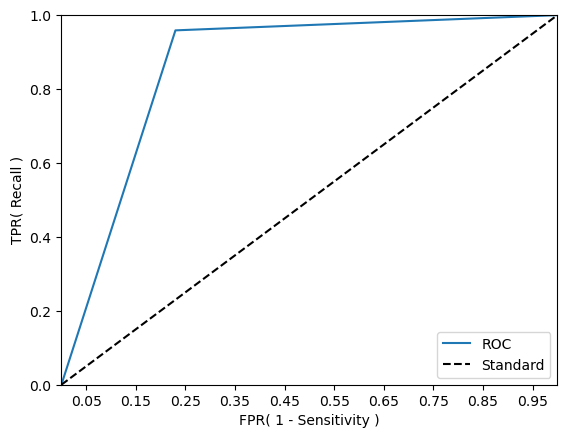

In [36]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

### 💡 6 Cycle 
> 다중공선성을 해소한 데이터에서 분류모델들을 사용하여 성능을 분석하겠습니다.
>
> 가장 성능이 높게 나온 분류모델의 Feature Importance와 기존 correlation과 비교하여 성능을 높혀보도록 하겠습니다.

In [69]:
from sklearn.model_selection import train_test_split
features, targets = pre_df.iloc[:, :-1] , pre_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split': [15,16,17]}


knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,55,65]}

dtc = DecisionTreeClassifier(random_state=124)
svc = SVC(probability=True, random_state=124) 
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)


knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [72]:
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [73]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 55, 65]},
             return_train_score=True)

In [74]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

rfc_parameters = {
    'rfc__max_depth' : [5,6,7],
    'rfc__min_samples_split' : [15,16,17]
}

ada_paramters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

gbc_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}


rfc = RandomForestClassifier(n_estimators=100)
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()),('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=5, n_jobs=-1)


g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_paramters, cv=5, n_jobs=-1)

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)

In [75]:
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [5, 6, 7],
                         'rfc__min_samples_split': [15, 16, 17]})

In [76]:
g_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [77]:
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [78]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)


evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)


[0]	validation_0-logloss:0.37318	validation_1-logloss:0.36765
[1]	validation_0-logloss:0.27181	validation_1-logloss:0.28787
[2]	validation_0-logloss:0.21667	validation_1-logloss:0.23133
[3]	validation_0-logloss:0.18263	validation_1-logloss:0.18809
[4]	validation_0-logloss:0.16248	validation_1-logloss:0.16447
[5]	validation_0-logloss:0.14051	validation_1-logloss:0.14479
[6]	validation_0-logloss:0.12881	validation_1-logloss:0.13289
[7]	validation_0-logloss:0.11503	validation_1-logloss:0.11480
[8]	validation_0-logloss:0.10171	validation_1-logloss:0.09988
[9]	validation_0-logloss:0.09320	validation_1-logloss:0.09135
[10]	validation_0-logloss:0.08878	validation_1-logloss:0.08629
[11]	validation_0-logloss:0.08413	validation_1-logloss:0.07975
[12]	validation_0-logloss:0.07965	validation_1-logloss:0.07622
[13]	validation_0-logloss:0.07241	validation_1-logloss:0.06900
[14]	validation_0-logloss:0.06631	validation_1-logloss:0.06421
[15]	validation_0-logloss:0.06085	validation_1-logloss:0.06091
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [79]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)



evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Number of positive: 411, number of negative: 323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559946 -> initscore=0.240941
[LightGBM] [Info] Start training from score 0.240941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [80]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 15}",0.816075,5
1,"{'max_depth': 5, 'min_samples_split': 16}",0.818796,2
2,"{'max_depth': 5, 'min_samples_split': 17}",0.820157,1
3,"{'max_depth': 6, 'min_samples_split': 15}",0.809254,9
4,"{'max_depth': 6, 'min_samples_split': 16}",0.813335,7
5,"{'max_depth': 6, 'min_samples_split': 17}",0.814696,6
6,"{'max_depth': 7, 'min_samples_split': 15}",0.809291,8
7,"{'max_depth': 7, 'min_samples_split': 16}",0.816094,4
8,"{'max_depth': 7, 'min_samples_split': 17}",0.817454,3


In [81]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.847405,5
1,{'knn__n_neighbors': 5},0.859668,3
2,{'knn__n_neighbors': 7},0.859678,2
3,{'knn__n_neighbors': 9},0.858308,4
4,{'knn__n_neighbors': 11},0.861019,1
5,{'knn__n_neighbors': 55},0.837862,7
6,{'knn__n_neighbors': 65},0.839232,6


In [82]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.865092,7
1,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.862380,9
2,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.870525,2
3,"{'rfc__max_depth': 6, 'rfc__min_samples_split'...",0.865092,7
4,"{'rfc__max_depth': 6, 'rfc__min_samples_split'...",0.873283,1
5,"{'rfc__max_depth': 6, 'rfc__min_samples_split'...",0.869201,3
6,"{'rfc__max_depth': 7, 'rfc__min_samples_split'...",0.867804,5
7,"{'rfc__max_depth': 7, 'rfc__min_samples_split'...",0.867822,4
8,"{'rfc__max_depth': 7, 'rfc__min_samples_split'...",0.865101,6


In [83]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.862380,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.858298,4
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.850126,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.861029,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.848765,9
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.850116,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.847414,10
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.850107,8
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.846026,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.861029,2


In [84]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.858286,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.841932,10
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.847374,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.848745,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.844653,8
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.846008,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.831042,12
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.841943,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.846024,5
9,"{'learning_rate': 1, 'n_estimators': 50}",0.835118,11


In [85]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.847395,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.840583,12
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.843323,11
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.851449,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.852810,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.851440,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.852810,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.855549,1
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.851440,5
9,"{'learning_rate': 1, 'n_estimators': 50}",0.848756,7


In [86]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.848740,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.847396,10
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.847390,11
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.848773,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.855576,1
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.854215,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.851478,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.854221,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.851511,5
9,"{'learning_rate': 1, 'n_estimators': 50}",0.854210,4


In [87]:
# from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [88]:
from sklearn.metrics import accuracy_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_recall = recall_score(y_test, dtc_prediction )
dtc_f1 = f1_score(y_test, dtc_prediction)

print(f'정확도 : {dtc_score}')
print(f'재현율 : {dtc_recall}')
print(f'F1 Score : {dtc_f1}')

정확도 : 0.8586956521739131
재현율 : 0.8969072164948454
F1 Score : 0.87


In [89]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
knn_recall = recall_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)

print(f'정확도 : {knn_score}')
print(f'재현율 : {knn_recall}')
print(f'F1 Score : {knn_f1}')

정확도 : 0.842391304347826
재현율 : 0.8762886597938144
F1 Score : 0.8542713567839196


In [90]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)

print(f'정확도 : {rfc_score}')
print(f'재현율 : {rfc_recall}')
print(f'F1 Score : {rfc_f1}')

정확도 : 0.875
재현율 : 0.9381443298969072
F1 Score : 0.8878048780487804


In [91]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
ada_recall = recall_score(y_test, ada_prediction)
ada_f1 = f1_score(y_test, ada_prediction)

print(f'정확도 : {ada_score}')
print(f'재현율 : {ada_recall}')
print(f'F1 Score : {ada_f1}')

정확도 : 0.8695652173913043
재현율 : 0.8969072164948454
F1 Score : 0.8787878787878788


In [92]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)

print(f'정확도 : {gbc_score}')
print(f'재현율 : {gbc_recall}')
print(f'F1 Score : {gbc_f1}')

정확도 : 0.8532608695652174
재현율 : 0.8969072164948454
F1 Score : 0.8656716417910447


In [93]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)

print(f'정확도 : {xgb_score}')
print(f'재현율 : {xgb_recall}')
print(f'F1 Score : {xgb_f1}')

정확도 : 0.8586956521739131
재현율 : 0.8969072164948454
F1 Score : 0.87


In [94]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
lg_recall = recall_score(y_test, lg_prediction)
lg_f1 = f1_score(y_test, lg_prediction)

print(f'정확도 : {lg_score}')
print(f'재현율 : {lg_recall}')
print(f'F1 Score : {lg_f1}')

정확도 : 0.8695652173913043
재현율 : 0.9072164948453608
F1 Score : 0.88


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[70 17]
 [ 6 91]]
정확도: 0.8750, 정밀도: 0.8426, 재현율: 0.9381, F1: 0.8878, ROC_AUC: 0.8714
################################################################################


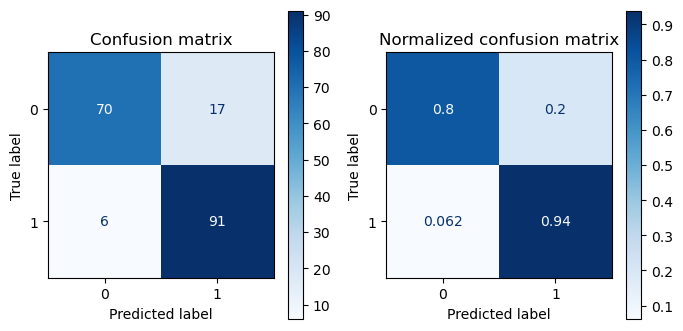

In [96]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

오차 행렬
[[73 14]
 [10 87]]
정확도: 0.8696, 정밀도: 0.8614, 재현율: 0.8969, F1: 0.8788, ROC_AUC: 0.8680
################################################################################


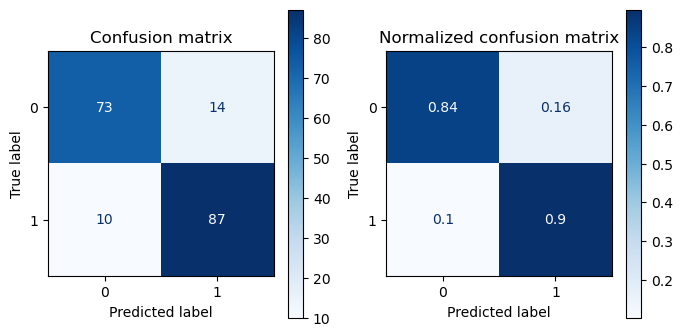

In [97]:
get_evaluation(y_test, ada_prediction, ada, X_test)

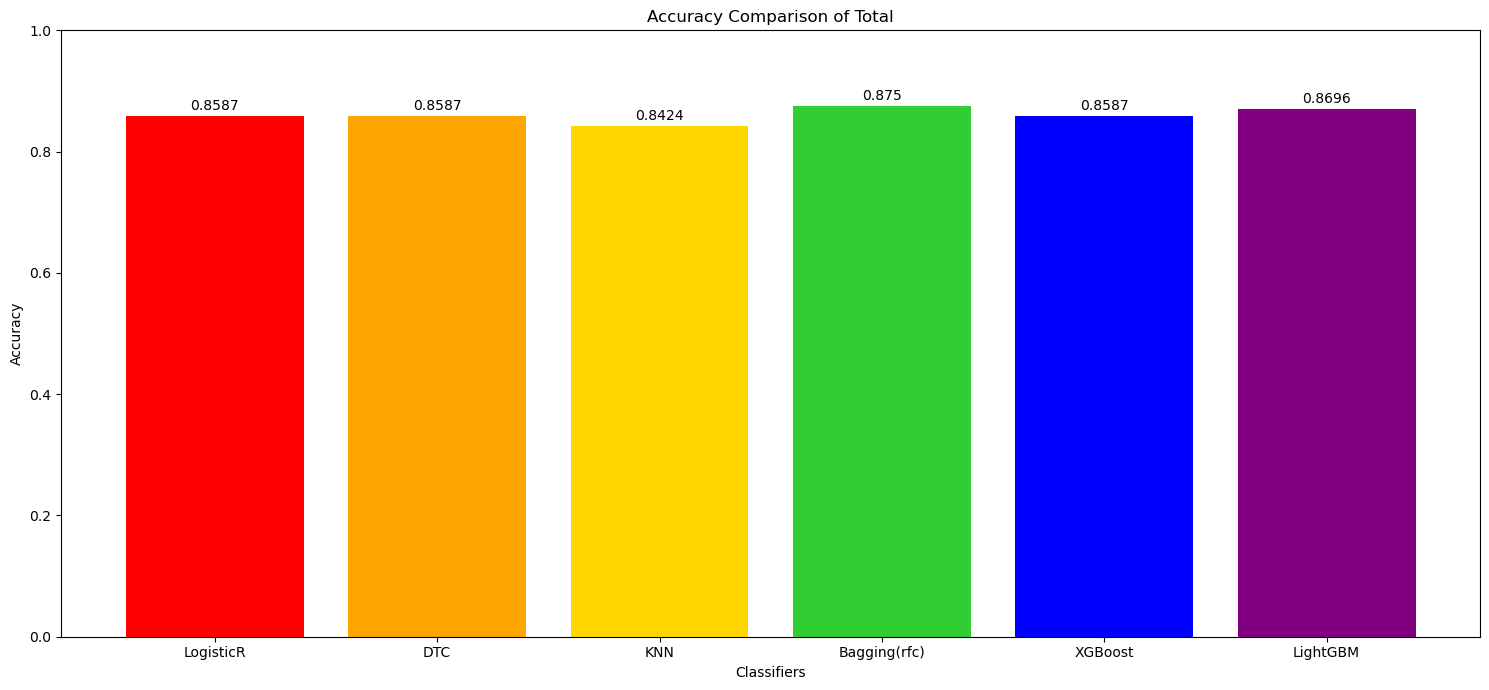

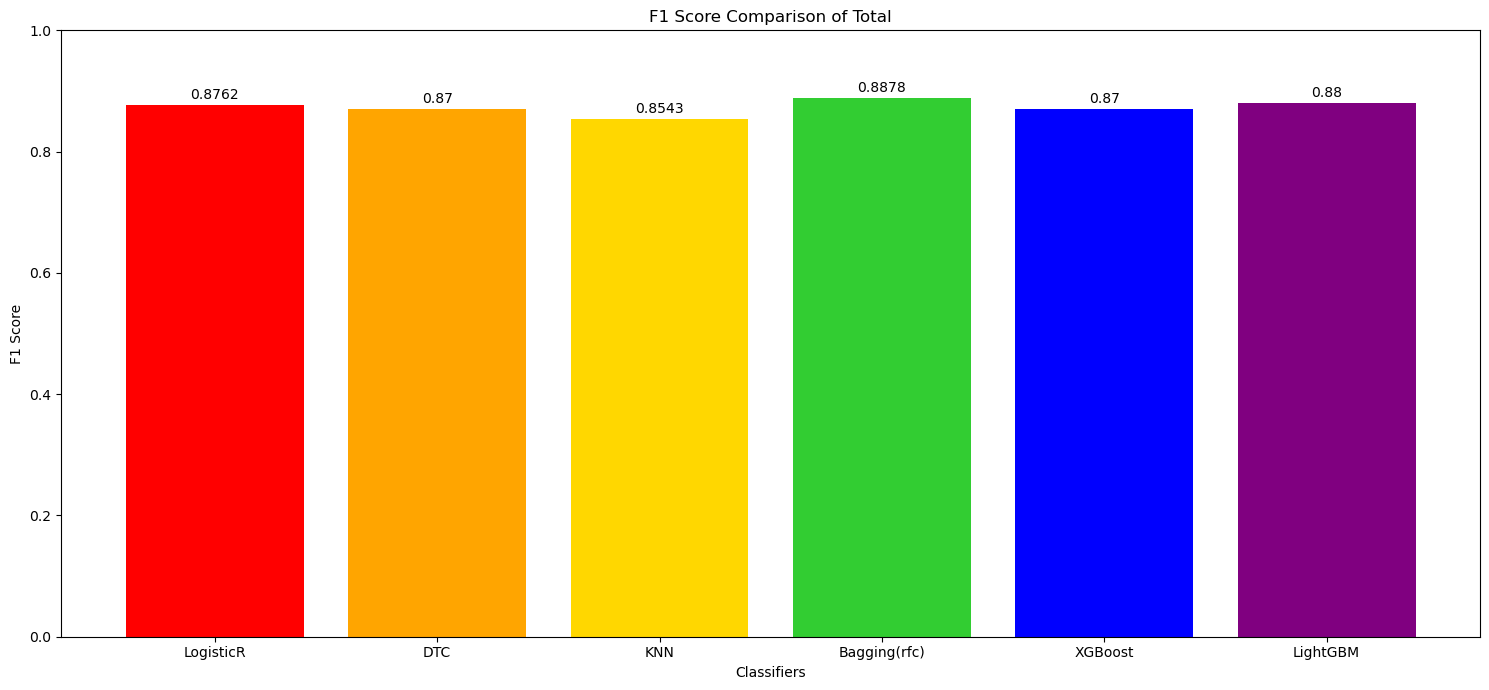

In [101]:
# 세 번째 바 차트
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8587, dtc_score, knn_score, rfc_score, xgb_score, lg_score]
classifiers3 = ['LogisticR', 'DTC' ,'KNN', 'Bagging(rfc)', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()
# 세 번째 바 차트
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8762, dtc_f1, knn_f1, rfc_f1, xgb_f1, lg_f1]
classifiers3 = ['LogisticR', 'DTC' ,'KNN', 'Bagging(rfc)', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()

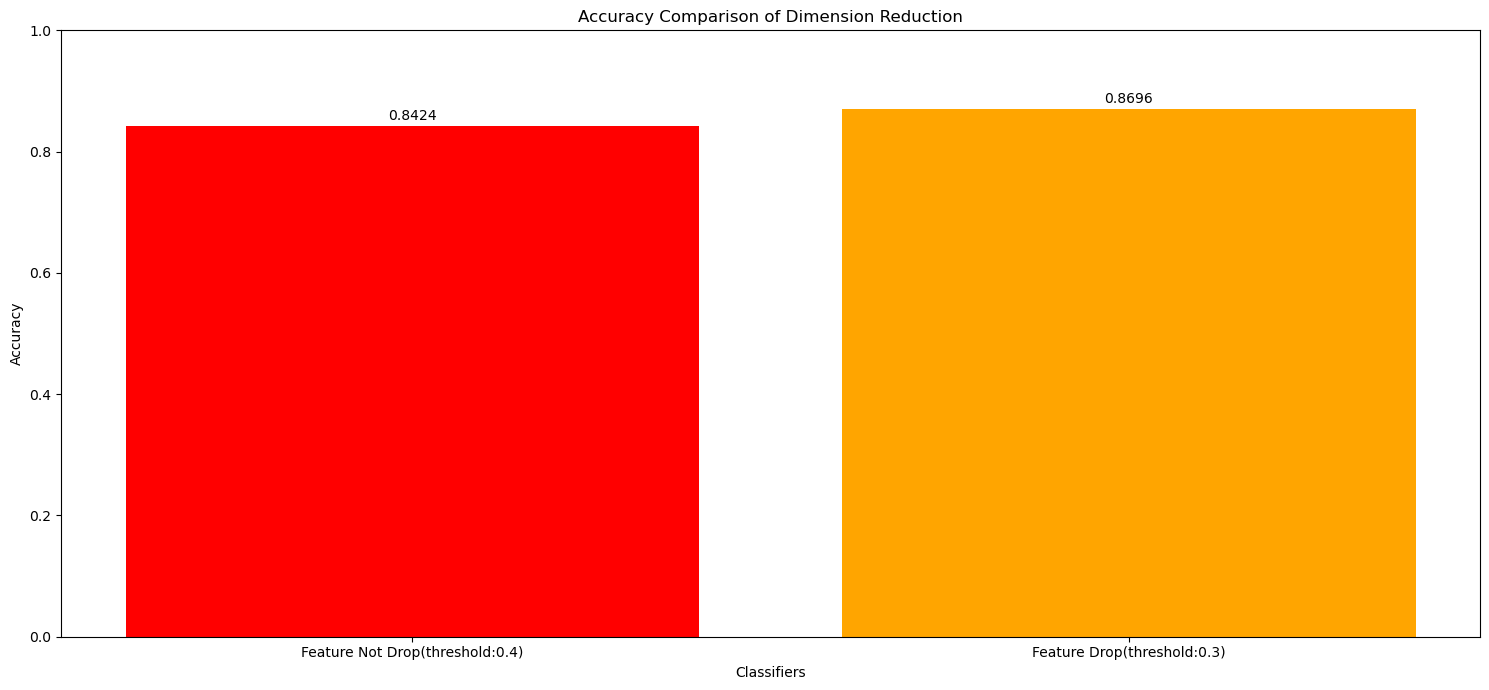

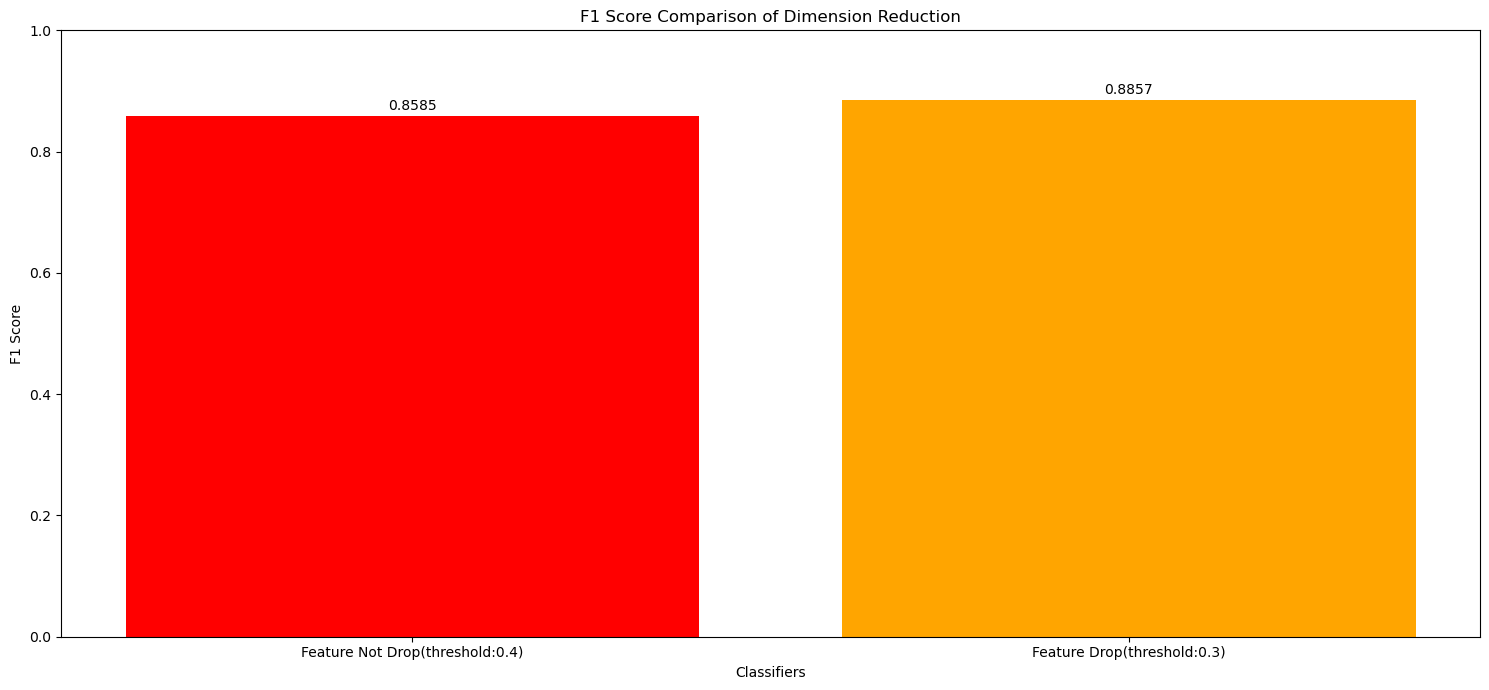

In [38]:
# 세 번째 바 차트
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8424, 0.8696]
classifiers3 = ['Feature Not Drop(threshold:0.4)', 'Feature Drop(threshold:0.3)']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Dimension Reduction')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()
# 세 번째 바 차트
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8585, 0.8857]
classifiers3 = ['Feature Not Drop(threshold:0.4)', 'Feature Drop(threshold:0.3)']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Dimension Reduction')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()